In [1]:
from google.colab import files
uploaded = files.upload()
# load the four regional data files

Saving NORTH_C.csv to NORTH_C.csv
Saving NORTH.csv to NORTH.csv
Saving FAR_WEST.csv to FAR_WEST.csv
Saving WEST.csv to WEST.csv


In [2]:
import pandas as pd
# read the csv files
north_df     = pd.read_csv("NORTH.csv")
north_c_df   = pd.read_csv("NORTH_C.csv")
far_west_df  = pd.read_csv("FAR_WEST.csv")
west_df      = pd.read_csv("WEST.csv")


In [3]:
display(north_df.head())
display(north_c_df.head())
display(far_west_df.head())
display(west_df.head())
#show the files to make sure it loaded correctly


,Year,Month,Day,Hour,Minute,Temperature,GHI,Dew Point,Relative Humidity,Wind Speed,region,EL
0,2012,1,1,1,30,6.9,0,0.6,64.08,5.7,NORTH,652.153054
1,2012,1,1,2,30,5.9,0,0.7,69.04,5.0,NORTH,643.483530
2,2012,1,1,3,30,5.0,0,0.7,73.87,4.2,NORTH,631.940923
3,2012,1,1,4,30,4.0,0,0.7,79.18,3.4,NORTH,631.428520
4,2012,1,1,5,30,3.2,0,0.6,83.09,2.9,NORTH,640.892563


,Year,Month,Day,Hour,Minute,Temperature,GHI,Relative Humidity,Wind Speed,Dew Point,region,EL
0,2012,1,1,1,30,8.4,0,60.75,5.4,1.3,NORTH_C,8648.989316
1,2012,1,1,2,30,6.9,0,62.50,4.9,0.2,NORTH_C,8553.212708
2,2012,1,1,3,30,5.8,0,67.57,4.1,0.3,NORTH_C,8461.317967
3,2012,1,1,4,30,4.9,0,73.27,3.5,0.5,NORTH_C,8438.693857
4,2012,1,1,5,30,4.1,0,78.45,3.1,0.7,NORTH_C,8565.433348


,Year,Month,Day,Hour,Minute,Temperature,Dew Point,GHI,Wind Speed,Relative Humidity,region,EL
0,2012,1,1,1,30,1.9,-7.2,0,3.2,50.87,FAR_WEST,1289.746813
1,2012,1,1,2,30,1.1,-7.7,0,3.2,52.06,FAR_WEST,1294.272245
2,2012,1,1,3,30,0.4,-8.2,0,3.1,52.57,FAR_WEST,1296.491345
3,2012,1,1,4,30,-0.3,-8.6,0,2.9,53.74,FAR_WEST,1297.417294
4,2012,1,1,5,30,-1.0,-8.7,0,2.7,55.77,FAR_WEST,1309.534911


,Year,Month,Day,Hour,Minute,Temperature,Relative Humidity,Dew Point,Wind Speed,GHI,region,EL
0,2012,1,1,1,30,3.4,44.47,-7.6,4.9,0,WEST,849.000892
1,2012,1,1,2,30,2.2,54.87,-5.9,4.0,0,WEST,845.097364
2,2012,1,1,3,30,1.0,64.49,-5.0,2.8,0,WEST,840.902849
3,2012,1,1,4,30,-0.2,72.33,-4.6,1.9,0,WEST,845.452257
4,2012,1,1,5,30,-1.0,77.26,-4.5,1.6,0,WEST,862.369386


In [4]:
# Check for nulls in each dataframe
for name, df in {
    "NORTH": north_df,
    "NORTH_C": north_c_df,
    "FAR_WEST": far_west_df,
    "WEST": west_df
}.items():
    print(f"\nNulls in {name}:")
    print(df.isna().sum())
    print(f"Total rows with any nulls in {name}: {df.isna().any(axis=1).sum()} out of {len(df)}")

# first row for hour 0 was not in the Electric Load data and was removed




Nulls in NORTH:
Year                 0
Month                0
Day                  0
Hour                 0
Minute               0
Temperature          0
GHI                  0
Dew Point            0
Relative Humidity    0
Wind Speed           0
region               0
EL                   4
dtype: int64
Total rows with any nulls in NORTH: 4 out of 35049

Nulls in NORTH_C:
Year                 0
Month                0
Day                  0
Hour                 0
Minute               0
Temperature          0
GHI                  0
Relative Humidity    0
Wind Speed           0
Dew Point            0
region               0
EL                   4
dtype: int64
Total rows with any nulls in NORTH_C: 4 out of 35043

Nulls in FAR_WEST:
Year                 0
Month                0
Day                  0
Hour                 0
Minute               0
Temperature          0
Dew Point            0
GHI                  0
Wind Speed           0
Relative Humidity    0
region               0
EL       

In [5]:
# Four missing values were found in the EL column of NORTH and NORTH_C
# data imputation was implemented using linear interpolation
# takes the average of the previous index
# and the subsequent index of the missing value
north_df["EL"] = north_df["EL"].interpolate(method="linear")
north_c_df["EL"] = north_c_df["EL"].interpolate(method="linear")


In [6]:
from sklearn.preprocessing import MinMaxScaler

# 1. Load the region CSVs
north_df     = pd.read_csv("NORTH.csv")
north_c_df   = pd.read_csv("NORTH_C.csv")
farwest_df   = pd.read_csv("FAR_WEST.csv")
west_df      = pd.read_csv("WEST.csv")

# 2. Select weather features to normalize
features_to_scale = ["Temperature", "Dew Point", "GHI", "Wind Speed", "Relative Humidity"]

# 3. Apply MinMaxScaler to each region (individually)
scaler = MinMaxScaler()

north_df[features_to_scale]     = scaler.fit_transform(north_df[features_to_scale])
north_c_df[features_to_scale]   = scaler.fit_transform(north_c_df[features_to_scale])
farwest_df[features_to_scale]   = scaler.fit_transform(farwest_df[features_to_scale])
west_df[features_to_scale]      = scaler.fit_transform(west_df[features_to_scale])


In [7]:
import numpy as np

def create_windowed_data(df, feature_columns, window_size):
    X = []
    y = []

    data = df[feature_columns].values
    target = df["EL"].values

    for i in range(len(df) - window_size):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size])  # the value right after the window

    return np.array(X), np.array(y)


In [8]:
# Same feature list and window size
features = ["Temperature", "Dew Point", "GHI", "Wind Speed", "Relative Humidity", "EL"]
window_size = 24

# Apply the same windowing function to each region
X_north,    y_north    = create_windowed_data(north_df,    features, window_size)
X_north_c,  y_north_c  = create_windowed_data(north_c_df,  features, window_size)
X_farwest,  y_farwest  = create_windowed_data(farwest_df,  features, window_size)
X_west,     y_west     = create_windowed_data(west_df,     features, window_size)

# Verify shapes
print("NORTH    →", X_north.shape,    y_north.shape)
print("NORTH_C  →", X_north_c.shape,  y_north_c.shape)
print("FAR_WEST →", X_farwest.shape,  y_farwest.shape)
print("WEST     →", X_west.shape,     y_west.shape)


NORTH    → (35025, 24, 6) (35025,)
NORTH_C  → (35019, 24, 6) (35019,)
FAR_WEST → (35015, 24, 6) (35015,)
WEST     → (35023, 24, 6) (35023,)


In [9]:
###
import numpy as np
from sklearn.metrics import mean_squared_error

def naive_baseline(X_test, y_test):
    """
    Naive baseline: predict the load is the same as the last hour in the input window.
    Assumes the last column of X_test is the load (EL) itself.

    X_test shape: (samples, window_size, num_features)
    y_test shape: (samples,)

    Returns RMSE of naive baseline.
    """
    # We take the last time-step from the window, last feature (the load).
    # If your load is not the last feature, adjust indexing.
    y_pred = X_test[:, -1, -1]  # shape: (samples,)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse, y_pred


In [10]:
###
import tensorflow as tf
from tensorflow import keras

def build_lstm_model(input_shape):
    """
    input_shape: (window_size, num_features)
    Returns a compiled LSTM model.
    """
    model = keras.Sequential([
        keras.layers.LSTM(64, input_shape=input_shape, return_sequences=False),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)  # single output: next hour's load
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss='mse',
        metrics=[keras.metrics.RootMeanSquaredError(name='rmse')]
    )
    return model


In [11]:
### Suppose west_df includes columns: Year, Month, Day, Hour, plus features & EL
train_val_df = west_df[west_df["Year"] < 2015].copy()
test_df      = west_df[west_df["Year"] == 2015].copy()

# Sort to ensure chronological order
train_val_df.sort_values(["Year","Month","Day","Hour"], inplace=True)
test_df.sort_values(["Year","Month","Day","Hour"], inplace=True)

# 80/20 split for train/val
split_index = int(len(train_val_df) * 0.8)
train_df = train_val_df.iloc[:split_index]
val_df   = train_val_df.iloc[split_index:]



In [12]:
# 1) Split West data into train_val (2012–2014) and test (2015)
train_val_df = west_df[west_df["Year"] < 2015].copy()
test_df      = west_df[west_df["Year"] == 2015].copy()

# Sort them by time to ensure chronological order
train_val_df.sort_values(["Year","Month","Day","Hour"], inplace=True)
test_df.sort_values(["Year","Month","Day","Hour"], inplace=True)

print("Train/Val shape:", train_val_df.shape)
print("Test shape:", test_df.shape)

# 2) Further split train_val into train (80%) and val (20%)
split_index = int(len(train_val_df) * 0.8)
train_df = train_val_df.iloc[:split_index].copy()
val_df   = train_val_df.iloc[split_index:].copy()

print("Train:", train_df.shape, "Val:", val_df.shape)


Train/Val shape: (26285, 12)
Test shape: (8762, 12)
Train: (21028, 12) Val: (5257, 12)


In [13]:
import numpy as np

# Windowing function
def create_windowed_data(df, feature_cols, target_col="EL", window_size=24):
    X_list, y_list = [], []

    # Convert to numpy
    data   = df[feature_cols].values
    target = df[target_col].values

    for i in range(len(df) - window_size):
        X_list.append(data[i:i+window_size])
        y_list.append(target[i + window_size])

    return np.array(X_list), np.array(y_list)

# Choose which columns to use as input features (exclude EL if it's included in df)
features = ["Temperature", "Dew Point", "GHI", "Wind Speed", "Relative Humidity"]
window_size = 24

# Create windowed data for each subset
X_train, y_train = create_windowed_data(train_df, features, "EL", window_size)
X_val,   y_val   = create_windowed_data(val_df,   features, "EL", window_size)
X_test,  y_test  = create_windowed_data(test_df,  features, "EL", window_size)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:",   X_val.shape,   "y_val:",   y_val.shape)
print("X_test:",  X_test.shape,  "y_test:",  y_test.shape)


X_train: (21004, 24, 5) y_train: (21004,)
X_val: (5233, 24, 5) y_val: (5233,)
X_test: (8738, 24, 5) y_test: (8738,)


In [14]:
import tensorflow as tf
from tensorflow import keras

def build_lstm_model(input_shape):
    """
    input_shape = (window_size, num_features)
    """
    model = keras.Sequential([
        keras.layers.LSTM(64, input_shape=input_shape, return_sequences=False),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)  # Predict single next-hour load
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss='mse',
        metrics=[keras.metrics.RootMeanSquaredError(name='rmse')]
    )
    return model

# Create the model
modelA = build_lstm_model((X_train.shape[1], X_train.shape[2]))
modelA.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,033 (78.25 KB)

 Trainable params: 20,033 (78.25 KB)

 Non-trainable params: 0 (0.00 B)

Train/Val shape: (26285, 12)
Test shape: (8762, 12)
Train: (21028, 12) Val: (5257, 12)
X_train: (21004, 24, 6) y_train: (21004,)
X_val: (5233, 24, 6) y_val: (5233,)
X_test: (8738, 24, 6) y_test: (8738,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,289 (79.25 KB)

 Trainable params: 20,289 (79.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1162889.5000 - rmse: 1078.3611 - val_loss: 1270871.6250 - val_rmse: 1127.3293
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 997359.3750 - rmse: 998.5106 - val_loss: 956019.8125 - val_rmse: 977.7626
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 695355.5000 - rmse: 833.3723 - val_loss: 581972.1250 - val_rmse: 762.8710
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 375350.1250 - rmse: 611.7874 - val_loss: 283401.4375 - val_rmse: 532.3546
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 157069.6875 - rmse: 395.6063 - val_loss: 132714.0312 - val_rmse: 364.2994
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 71007.3203 - rmse: 266.3130 - val_loss: 81066.2266 - val_rmse: 284.7213
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 52089.2891 - rmse: 228.1745 - val_loss: 67514.4141 - val_rmse: 259.8354
Epoch 8/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 49

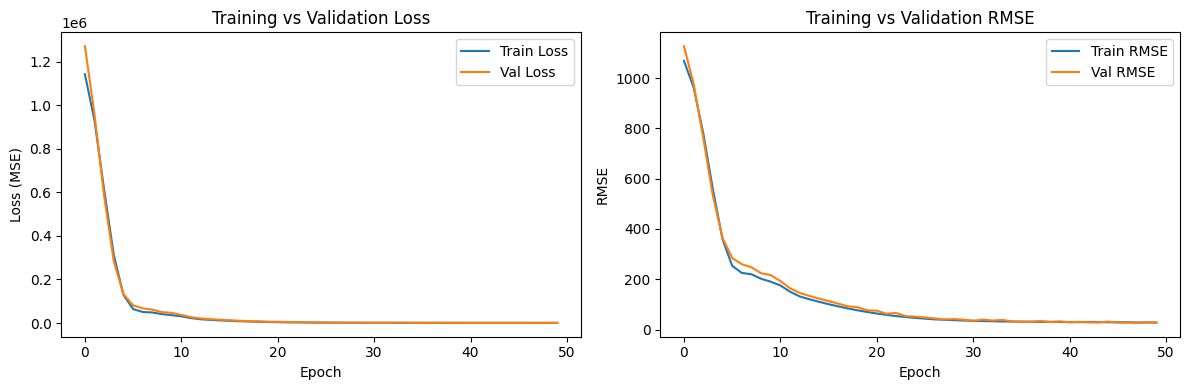

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


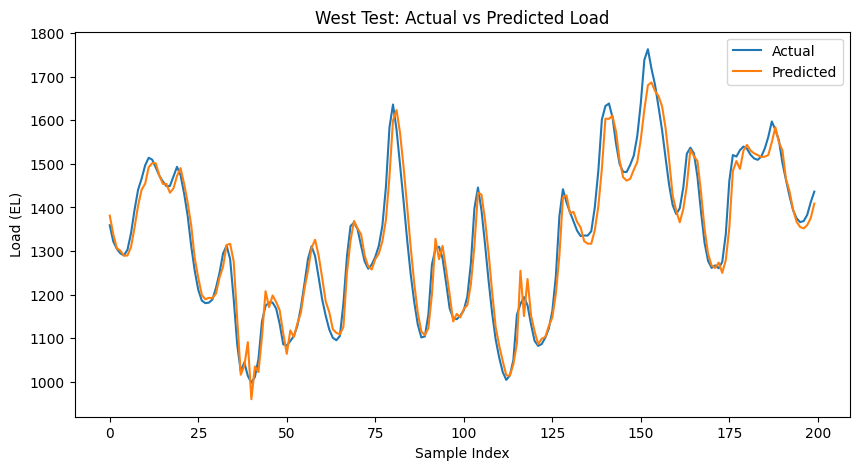

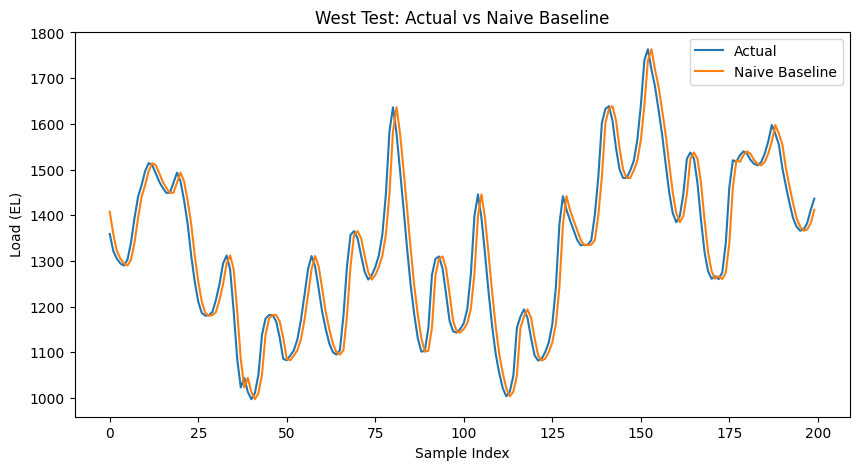

In [15]:
###############################################
# 0) Prerequisites
###############################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

###############################################
# 1) Time-based split: (2012–2014) → train/val, (2015) → test
###############################################
# Sort west_df to ensure chronological order
west_df.sort_values(["Year","Month","Day","Hour"], inplace=True)

train_val_df = west_df[west_df["Year"] < 2015].copy()
test_df      = west_df[west_df["Year"] == 2015].copy()

print("Train/Val shape:", train_val_df.shape)
print("Test shape:", test_df.shape)

# 80/20 split for train_val
split_index = int(len(train_val_df) * 0.8)
train_df = train_val_df.iloc[:split_index].copy()
val_df   = train_val_df.iloc[split_index:].copy()

print("Train:", train_df.shape, "Val:", val_df.shape)

###############################################
# 2) Windowing function (24-hour window)
#    We'll include 'EL' as a feature so we can do a naive baseline easily.
###############################################
def create_windowed_data(df, feature_cols, window_size=24):
    """
    feature_cols should include 'EL' if you want naive baseline from last hour in window.
    Returns X, y arrays:
      X.shape = (samples, window_size, len(feature_cols))
      y.shape = (samples,)
    We'll predict next hour's load (EL).
    """
    data = df[feature_cols].values
    # The last column in 'feature_cols' is assumed to be 'EL'.

    X_list, y_list = [], []
    for i in range(len(data) - window_size):
        # Past window_size rows
        X_list.append(data[i : i + window_size])
        # Next hour's EL (the last column in row i+window_size)
        y_list.append(data[i + window_size, -1])

    return np.array(X_list), np.array(y_list)

# Choose features: 5 weather + 'EL' as last column
features = ["Temperature", "Dew Point", "GHI", "Wind Speed", "Relative Humidity", "EL"]
window_size = 24

# Window each subset
X_train, y_train = create_windowed_data(train_df, features, window_size)
X_val,   y_val   = create_windowed_data(val_df,   features, window_size)
X_test,  y_test  = create_windowed_data(test_df,  features, window_size)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:",   X_val.shape,   "y_val:",   y_val.shape)
print("X_test:",  X_test.shape,  "y_test:",  y_test.shape)

###############################################
# 3) Naive baseline: next hour's load = last hour's load in the window
###############################################
def naive_baseline(X_test, y_test):
    """
    X_test shape = (samples, window_size, 6) [the last feature is EL]
    y_test shape = (samples,)
    We'll predict y_pred[i] = X_test[i, -1, -1] (the load at the last hour in the window).
    """
    y_pred = X_test[:, -1, -1]  # last hour in the window, last feature (EL)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return rmse, y_pred

###############################################
# 4) Build a simple LSTM model
###############################################
def build_lstm_model(input_shape):
    """
    input_shape = (window_size, num_features)
    """
    model = keras.Sequential([
        keras.layers.LSTM(64, input_shape=input_shape, return_sequences=False),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss='mse',
        metrics=[keras.metrics.RootMeanSquaredError(name='rmse')]
    )
    return model

model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
model.summary()

###############################################
# 5) Train with EarlyStopping (max 30 epochs)
###############################################
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,              # stop if val_loss doesn't improve for 5 epochs
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

###############################################
# 6) Evaluate on test set & compare to baseline
###############################################
mse, rmse = model.evaluate(X_test, y_test, verbose=0)
print(f"\nLSTM on West Test -> MSE: {mse:.2f}, RMSE: {rmse:.2f}")

baseline_rmse, y_pred_baseline = naive_baseline(X_test, y_test)
print(f"Naive Baseline on West Test -> RMSE: {baseline_rmse:.2f}")

###############################################
# 7) Visualize training curves
###############################################
def plot_training_history(history):
    plt.figure(figsize=(12,4))

    # Subplot 1: Loss
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Training vs Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.legend()

    # Subplot 2: RMSE
    if 'rmse' in history.history:
        plt.subplot(1,2,2)
        plt.plot(history.history['rmse'], label='Train RMSE')
        plt.plot(history.history['val_rmse'], label='Val RMSE')
        plt.title("Training vs Validation RMSE")
        plt.xlabel("Epoch")
        plt.ylabel("RMSE")
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

###############################################
# 8) Visualize final predictions vs actual
###############################################
def plot_test_predictions(model, X_test, y_test, num_samples=200):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(10,5))
    plt.plot(y_test[:num_samples], label='Actual')
    plt.plot(y_pred[:num_samples], label='Predicted')
    plt.title("West Test: Actual vs Predicted Load")
    plt.xlabel("Sample Index")
    plt.ylabel("Load (EL)")
    plt.legend()
    plt.show()

plot_test_predictions(model, X_test, y_test)

###############################################
# 9) Visualize naive baseline vs actual
###############################################
def plot_naive_baseline(X_test, y_test, num_samples=200):
    y_pred = X_test[:, -1, -1]  # last hour's load in the window
    plt.figure(figsize=(10,5))
    plt.plot(y_test[:num_samples], label='Actual')
    plt.plot(y_pred[:num_samples], label='Naive Baseline')
    plt.title("West Test: Actual vs Naive Baseline")
    plt.xlabel("Sample Index")
    plt.ylabel("Load (EL)")
    plt.legend()
    plt.show()

plot_naive_baseline(X_test, y_test)


Pretraining on OTHER regions...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1232/1232 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 55647544.0000 - rmse: 7457.4180
Epoch 2/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 32348428.0000 - rmse: 5683.0898
Epoch 3/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 17607174.0000 - rmse: 4193.5410
Epoch 4/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 13481822.0000 - rmse: 3669.7859
Epoch 5/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 8543735.0000 - rmse: 2922.2034
Epoch 6/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 7757850.0000 - rmse: 2784.7314
Epoch 7/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 5964672.0000 - rmse: 2441.5791
Epoch 8/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 5809585.5000 - rmse: 2409.5366
Epoch 9/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4952682.0000 - rmse: 2224.6680
Epoch 10/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4922975.5000 - rmse: 2216.8621

Fine-tuning on WEST region...
Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7m

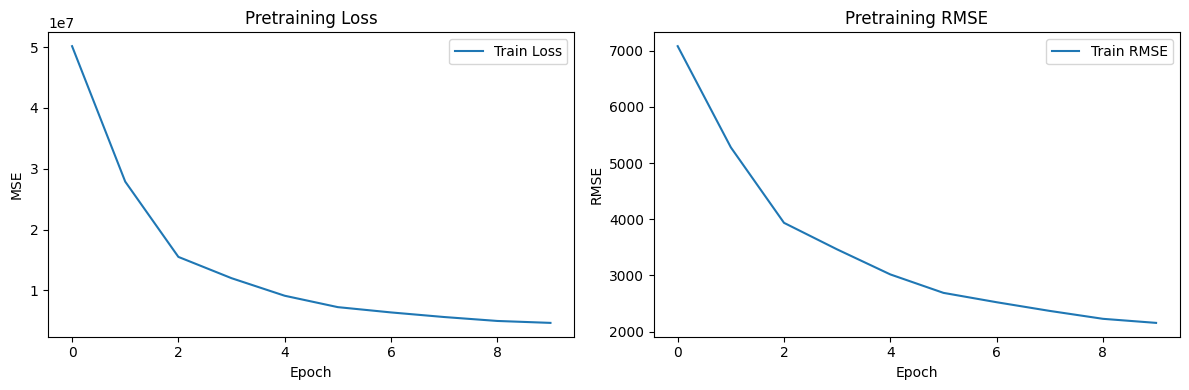

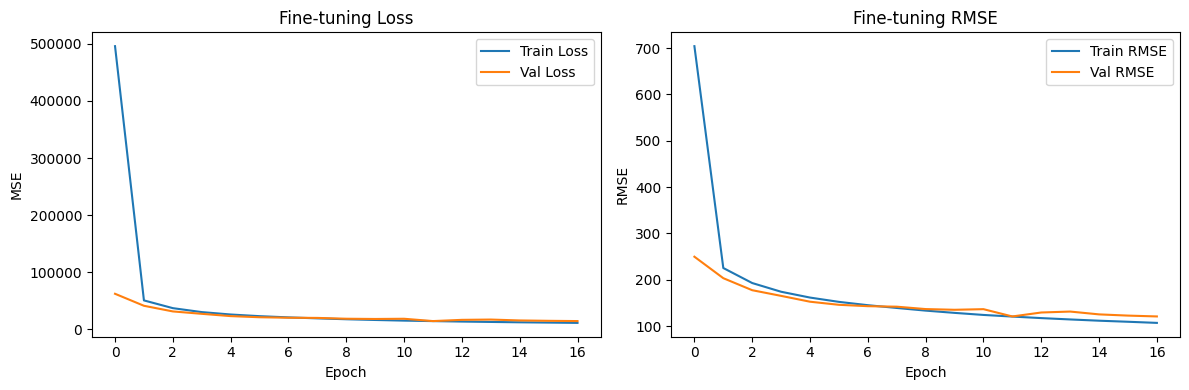

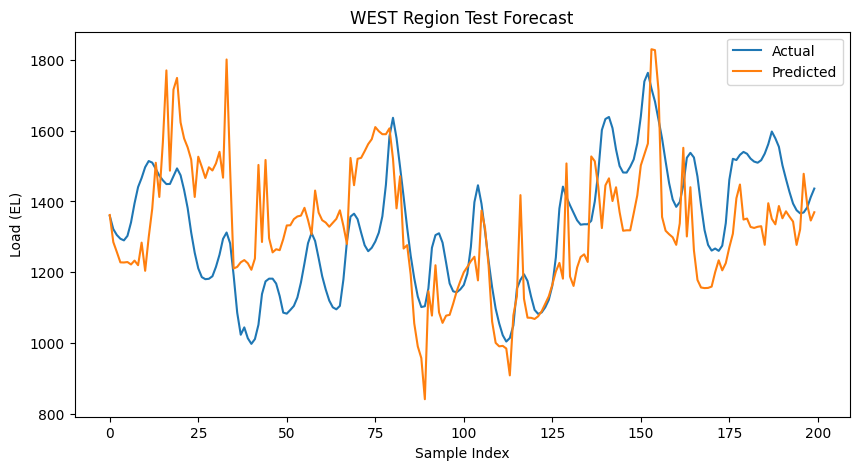

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

# Load the cleaned data
north_df    = pd.read_csv("NORTH.csv")
north_c_df  = pd.read_csv("NORTH_C.csv")
farwest_df  = pd.read_csv("FAR_WEST.csv")
west_df     = pd.read_csv("WEST.csv")

# Drop missing and convert time fields
for df in [north_df, north_c_df, farwest_df, west_df]:
    df.dropna(inplace=True)
    for col in ["Year", "Month", "Day", "Hour"]:
        df[col] = df[col].astype(int)

# Define feature columns (exclude EL) and target
features = ["Temperature", "Dew Point", "GHI", "Wind Speed", "Relative Humidity"]
target = "EL"
window_size = 24

# Windowing function
def create_windowed_data(df, feature_cols, target_col="EL", window_size=24):
    feature_data = df[feature_cols].values
    target_data = df[target_col].values
    X_list, y_list = [], []
    for i in range(len(df) - window_size):
        X_list.append(feature_data[i : i + window_size])
        y_list.append(target_data[i + window_size])
    return np.array(X_list), np.array(y_list)

# Combine and sort the other regions
others_df = pd.concat([north_df, north_c_df, farwest_df], axis=0)
others_df.sort_values(["Year", "Month", "Day", "Hour"], inplace=True)
others_train = others_df[others_df["Year"] < 2015].copy()
X_others_train, y_others_train = create_windowed_data(others_train, features, target, window_size)

# Prepare WEST region (train/val/test)
west_df.sort_values(["Year", "Month", "Day", "Hour"], inplace=True)
west_train_val = west_df[west_df["Year"] < 2015].copy()
west_test = west_df[west_df["Year"] == 2015].copy()

split_idx = int(len(west_train_val) * 0.8)
west_train = west_train_val.iloc[:split_idx].copy()
west_val = west_train_val.iloc[split_idx:].copy()

X_west_train, y_west_train = create_windowed_data(west_train, features, target, window_size)
X_west_val,   y_west_val   = create_windowed_data(west_val,   features, target, window_size)
X_west_test,  y_west_test  = create_windowed_data(west_test,  features, target, window_size)

# Build LSTM model
def build_lstm_model(input_shape):
    model = keras.Sequential([
        keras.layers.LSTM(64, input_shape=input_shape),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss='mse',
        metrics=[keras.metrics.RootMeanSquaredError(name="rmse")]
    )
    return model

model = build_lstm_model((window_size, len(features)))

# Pretrain on other regions
print("Pretraining on OTHER regions...")
early_stop_pretrain = keras.callbacks.EarlyStopping(monitor="loss", patience=3, restore_best_weights=True)
history_pretrain = model.fit(
    X_others_train, y_others_train,
    epochs=10,
    batch_size=64,
    callbacks=[early_stop_pretrain],
    verbose=1
)

# Fine-tune on WEST
print("\nFine-tuning on WEST region...")
early_stop_finetune = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history_finetune = model.fit(
    X_west_train, y_west_train,
    validation_data=(X_west_val, y_west_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop_finetune],
    verbose=1
)

# Evaluate and predict
mse, rmse = model.evaluate(X_west_test, y_west_test, verbose=0)
print(f"\nFinal Test MSE: {mse:.2f}, RMSE: {rmse:.2f}")
y_pred = model.predict(X_west_test)

# Plot training history
def plot_training_history(history, title="Training"):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label="Train Loss")
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label="Val Loss")
    plt.title(f"{title} Loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['rmse'], label="Train RMSE")
    if 'val_rmse' in history.history:
        plt.plot(history.history['val_rmse'], label="Val RMSE")
    plt.title(f"{title} RMSE")
    plt.xlabel("Epoch")
    plt.ylabel("RMSE")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot test predictions
def plot_test_predictions(y_true, y_pred, num_samples=200, title="Test Predictions"):
    plt.figure(figsize=(10,5))
    plt.plot(y_true[:num_samples], label="Actual")
    plt.plot(y_pred[:num_samples], label="Predicted")
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Load (EL)")
    plt.legend()
    plt.show()

plot_training_history(history_pretrain, "Pretraining")
plot_training_history(history_finetune, "Fine-tuning")
plot_test_predictions(y_west_test, y_pred, title="WEST Region Test Forecast")
